# 1. Load and Inspect Data

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [45]:
data.shape

(917, 20)

In [46]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [47]:
# Rename the columns
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)

Drop unnecessary columns from the dataset.

In [48]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [49]:
data['CNEN'].value_counts()

CNEN
Khlong Saen Saep                               33
Khlong Prem Prachakorn                         24
Khlong Chong Nonsi                             18
Khlong Rob Krung                               18
Khlong Phlapphla                               18
                                               ..
Khlong Bang Luang                               1
Khlong Phra Rajadamri 1 (Khlong Bueng Phai)     1
Khlong Phraya Suren                             1
Orachon Canal                                   1
Khlong Tanod                                    1
Name: count, Length: 168, dtype: int64

**Data Preprocessing**

In [50]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CID,917.0,7.297593e+02,5.539785e+02,12.0,2.210000e+02,5.910000e+02,1.191000e+03,1.822000e+03
Year,917.0,2.562009e+03,8.200079e-01,2561.0,2.561000e+03,2.562000e+03,2.563000e+03,2.563000e+03
Temp,917.0,2.869433e+01,1.845115e+00,0.0,2.850000e+01,2.900000e+01,2.930000e+01,3.190000e+01
pH,917.0,7.242007e+00,4.628296e-01,0.0,7.130000e+00,7.290000e+00,7.400000e+00,9.100000e+00
DO,917.0,1.667045e+00,1.282984e+00,0.0,5.100000e-01,1.600000e+00,2.600000e+00,9.700000e+00
HS,917.0,1.798037e-01,3.896647e-01,0.0,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e+00
BO,917.0,1.280267e+01,9.397183e+00,0.0,6.250000e+00,9.800000e+00,1.583000e+01,8.450000e+01
CO,917.0,6.410376e+01,2.235050e+01,0.0,5.100000e+01,6.050000e+01,7.210000e+01,2.020000e+02
SS,917.0,2.195372e+01,1.719485e+01,0.0,1.200000e+01,1.700000e+01,2.600000e+01,1.483000e+02
TKN,917.0,7.999945e+00,5.133194e+00,0.0,4.100000e+00,7.100000e+00,1.080000e+01,3.980000e+01


Check for column types.

In [51]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

In [52]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

Check for null values in the dataset.

In [53]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

Seems we have no null values in our dataset.

In [54]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,61,61
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,58,61
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,114,61
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,155,61
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,28,61


In [55]:
# Skewness and Kurtosis of numerical columns
print("Skewness:\n", data.select_dtypes(include='number').skew())

Skewness:
 CID       0.465911
Year     -0.016114
Temp    -12.500872
pH      -12.456230
DO        0.672971
HS        5.532990
BO        2.243097
CO        2.282213
SS        3.015937
TKN       1.404893
AN        1.444743
NO2N      0.935423
NO3N      2.221041
TP        0.721560
TC             NaN
WSPEN    -0.004069
CNEN     -0.010430
dtype: float64


In [56]:
print("\nKurtosis:\n", data.select_dtypes(include='number').kurtosis())


Kurtosis:
 CID       -1.116403
Year      -1.512721
Temp     190.207743
pH       195.164468
DO         1.272318
HS        48.930997
BO         7.508975
CO         9.833919
SS        13.187015
TKN        3.640077
AN         2.644681
NO2N       0.777716
NO3N      15.322368
TP         0.871746
TC              NaN
WSPEN     -1.254632
CNEN      -1.062828
dtype: float64


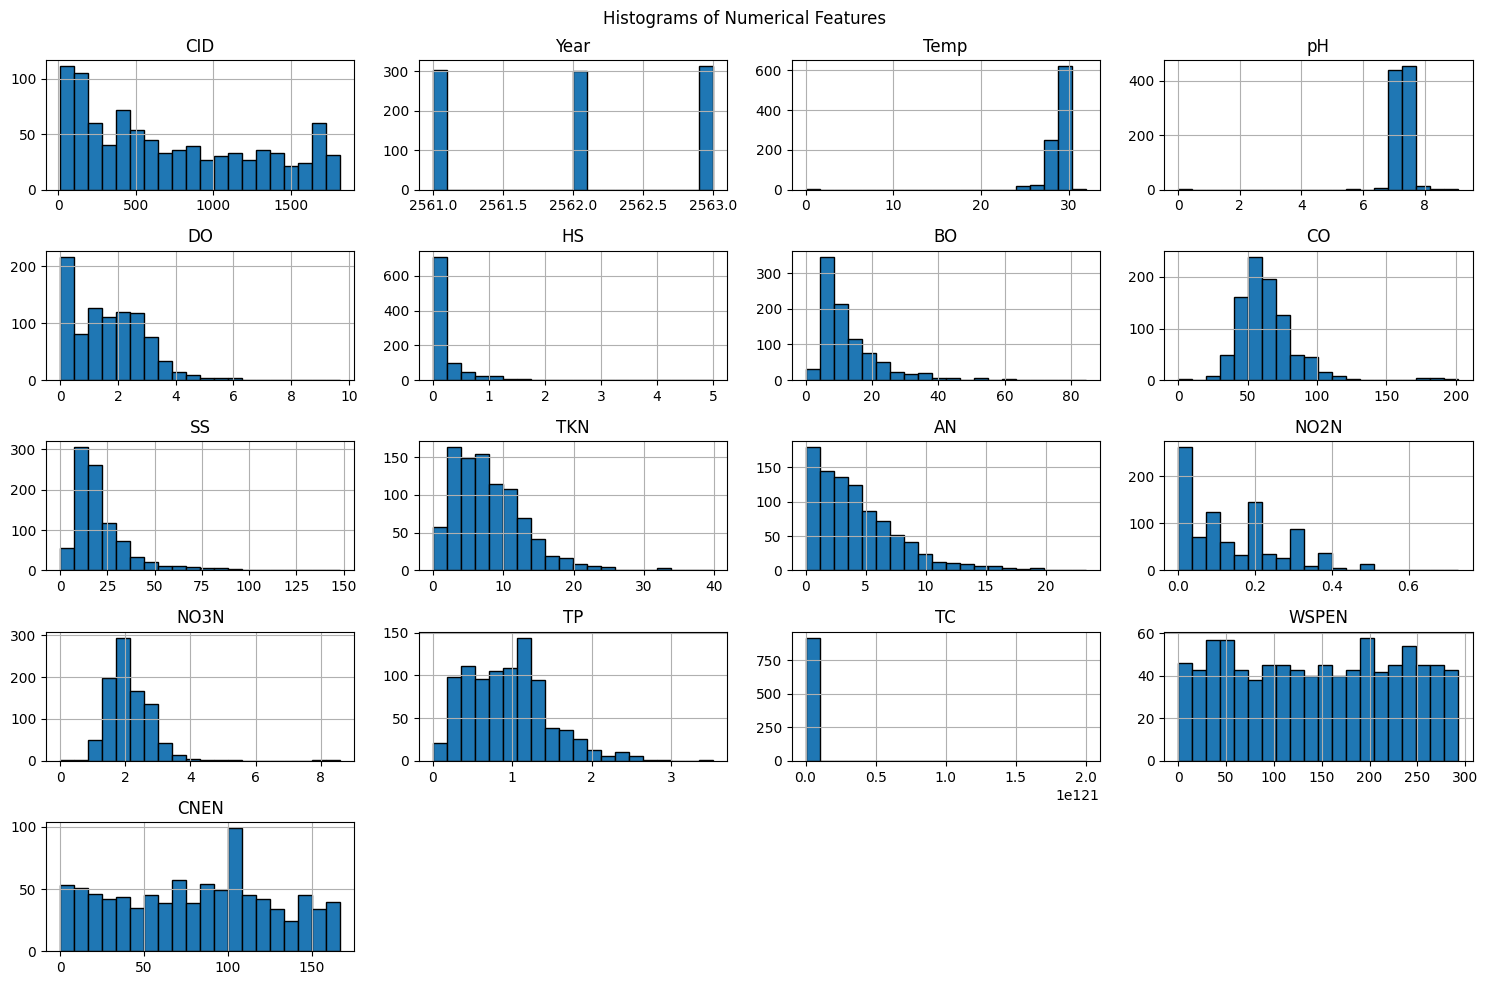

In [57]:
# Visualize distribution of numerical features
data.select_dtypes(include='number').hist(bins=20, figsize=(15,10), edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

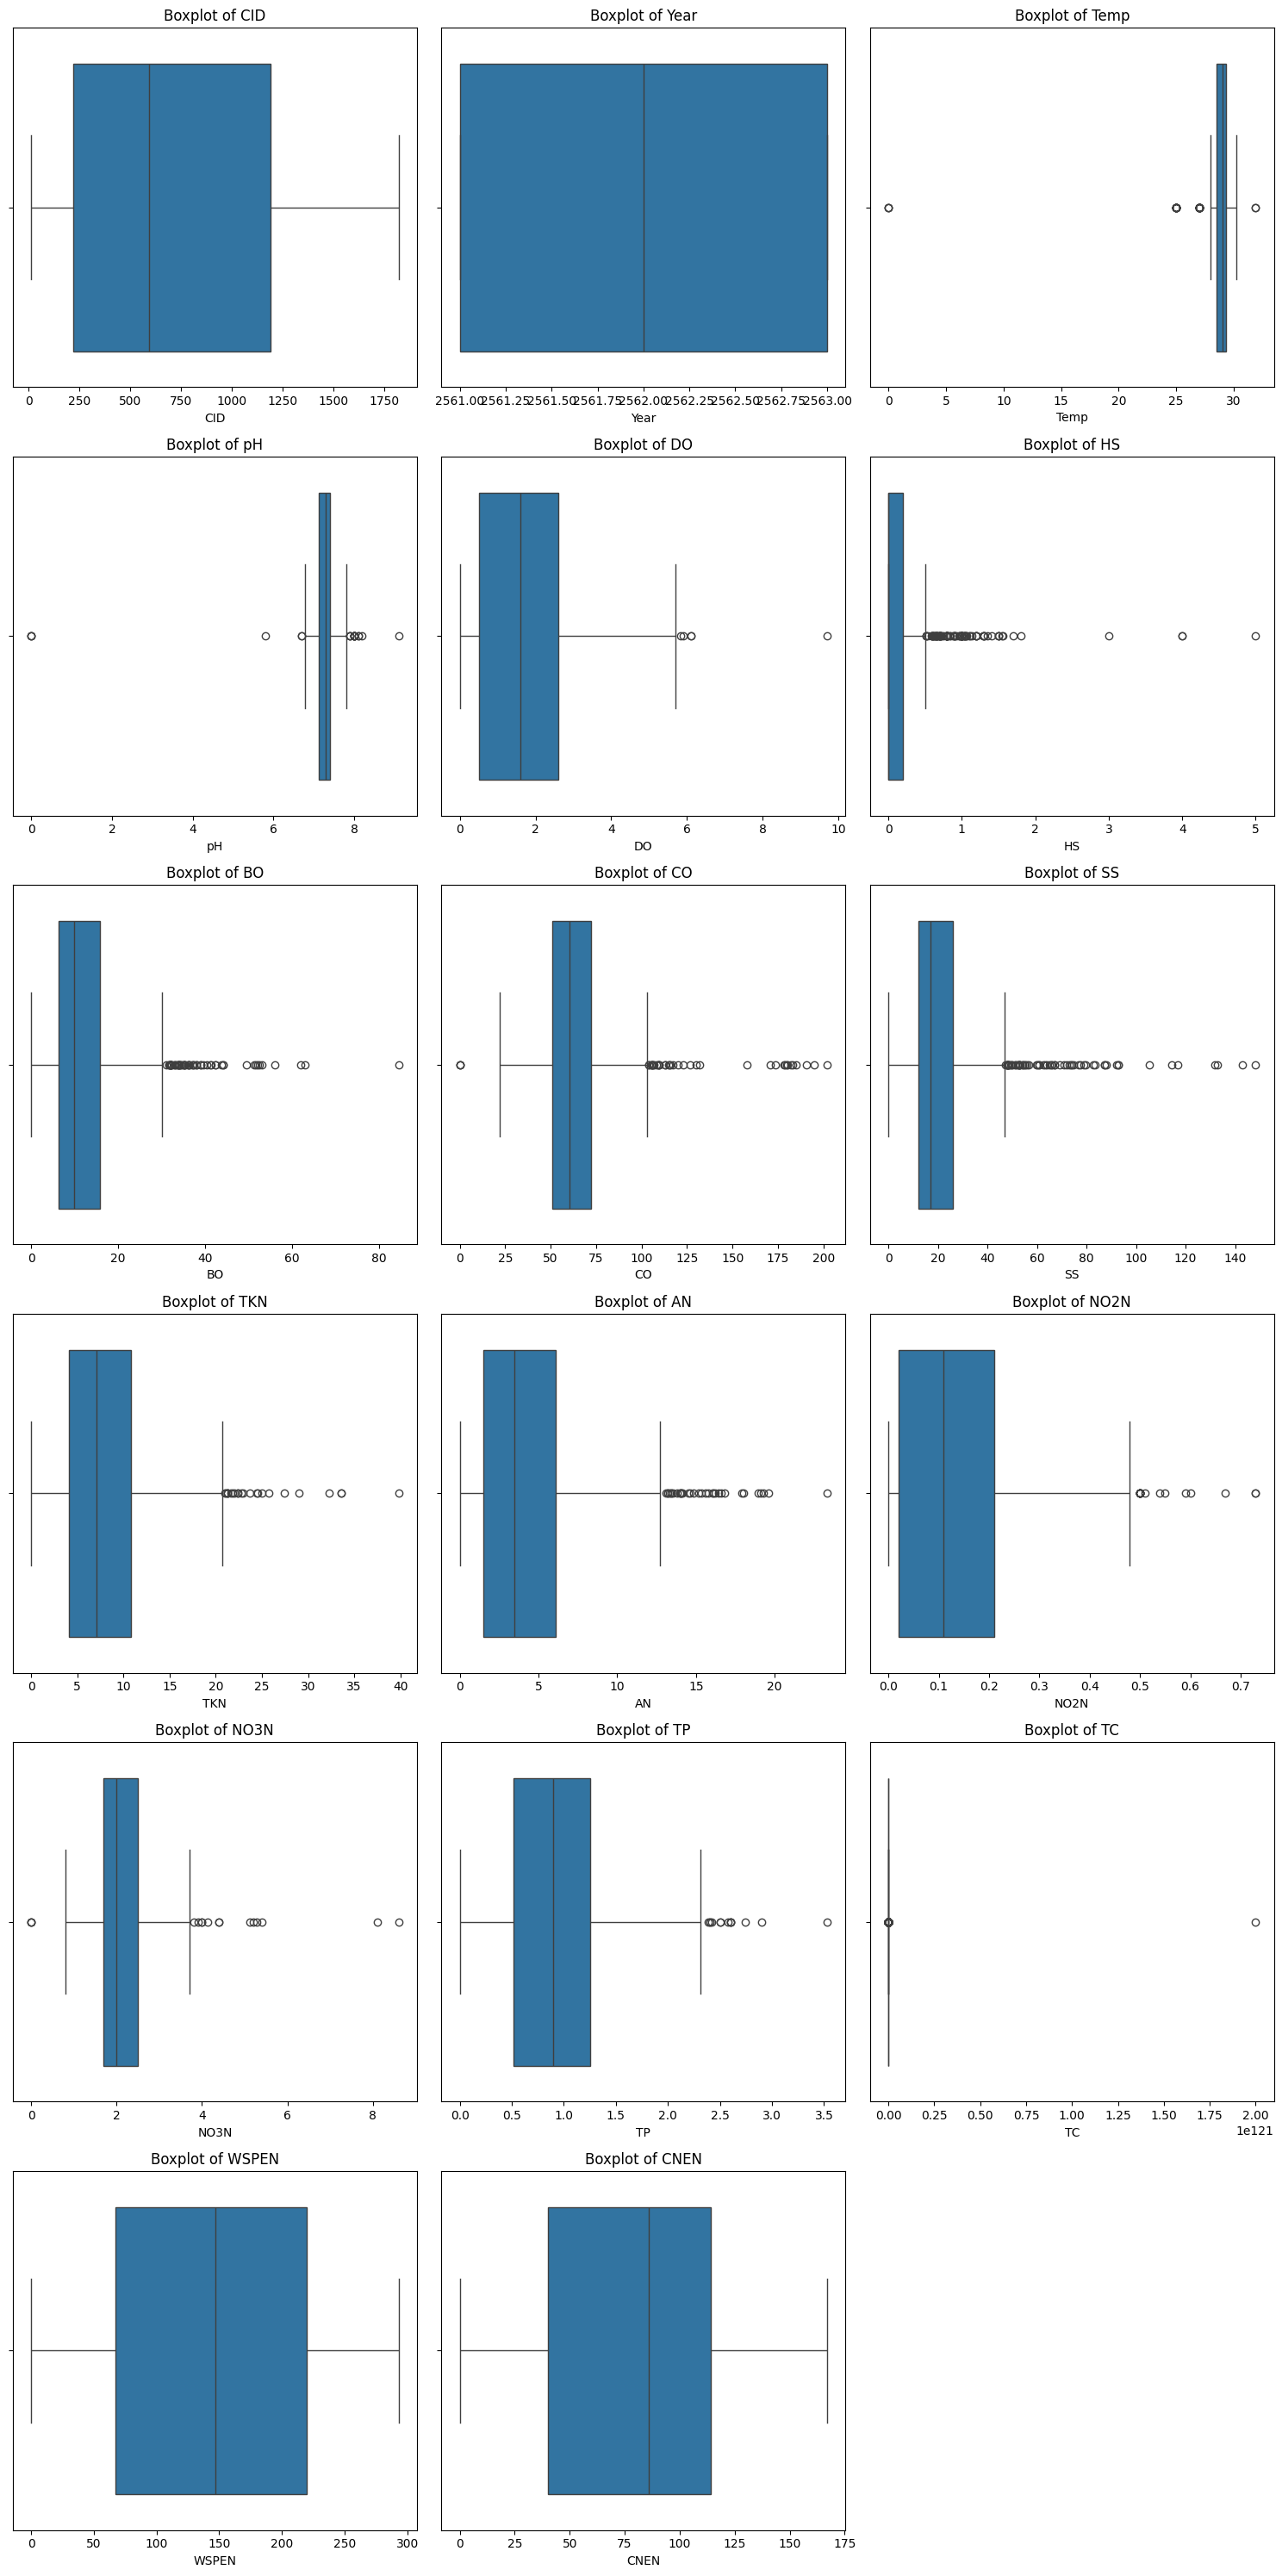

In [58]:
# Create boxplots to detect outliers
import math
numeric_cols = data.select_dtypes(include='number').columns
rows = math.ceil(len(numeric_cols)/3)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

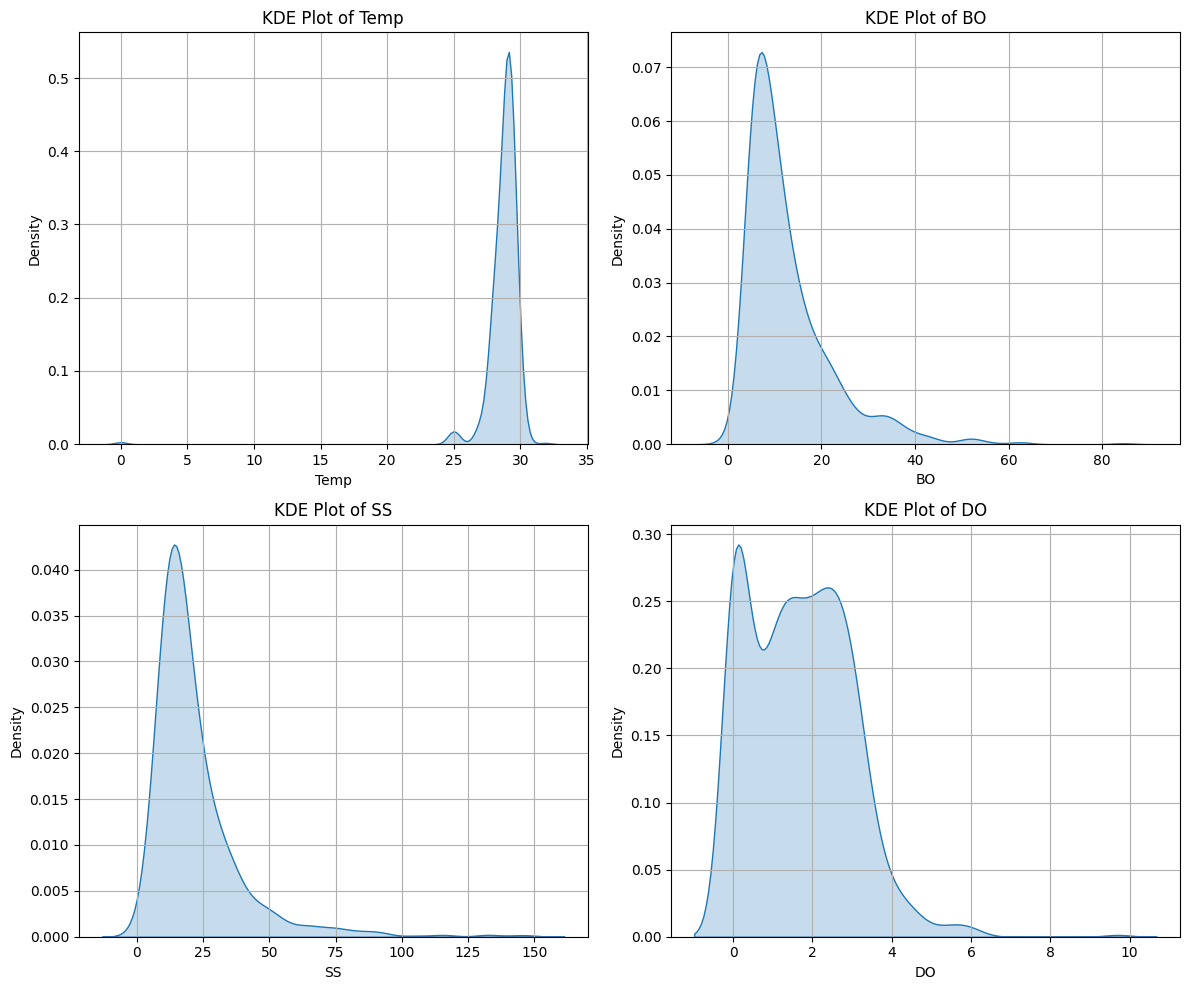

In [59]:
features = ['Temp', 'BO', 'SS', 'DO']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(data[col], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {col}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [60]:
from scipy.stats import zscore

z_scores = np.abs(zscore(data.select_dtypes(include='number')))
outlier_mask = (z_scores > 3)
outliers = (outlier_mask.sum(axis=1) > 0)
print("Outlier Rows:", outliers.sum())


Outlier Rows: 88


In [61]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

**Feature Engineering**

Here lets engineer a new feature called WQI (Simple Water Quality Index) using the formula 
- WQI = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [62]:
# data["TDS"] = (
#     0.6 * data["NO3N"] +
#     0.8 * data["NO2N"] +
#     0.5 * data["TKN"] +
#     0.7 * data["AN"] + #NH3N
#     0.9 * data["TP"] +
#     0.05 * data["SS"]
# )

# data['TDS'] = data['TDS'] * 50  #tuned for COND 200–1500 μS/cm
# data['COND'] = 0.7 * data['TDS']

In [63]:
# data['COND'].describe()

In [64]:
data['TC'].describe()

count     9.170000e+02
mean     2.181025e+118
std      6.604582e+119
min       0.000000e+00
25%       1.220000e+08
50%       1.530000e+10
75%       2.100000e+12
max      2.000000e+121
Name: TC, dtype: float64

In [65]:
data['TC_log'] = np.log10(data['TC'] + 1)
data['TC_log'].describe()

count    917.000000
mean      10.508681
std        5.765990
min        0.000000
25%        8.086360
50%       10.184691
75%       12.322219
max      121.301030
Name: TC_log, dtype: float64

In [66]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'TC_log'],
      dtype='object')

In [77]:

# Step 2: Apply log transformation to TC to handle extreme values
data['TC_log'] = np.log10(data['TC'] + 1)

# Step 3: Cap TC_log at a reasonable maximum (e.g., 7, equivalent to TC = 10^7)
# This prevents TC from overly skewing the WQI while still indicating poor quality
data['TC_log'] = data['TC_log'].clip(upper=7)

# Step 4: Define normalization functions (q_i) where higher values = better quality
# These are based on typical WHO/Thailand PCD standards; adjust as needed
def normalize_ph(ph):
    if 5 <= ph < 7:
        return 100 * (ph - 5) / (7 - 5)
    elif 7 <= ph <= 9.5:
        return 100 * (9.5 - ph) / (9.5 - 7)
    else:
        return 0

def normalize_do(do):
    return min(100, max(0, 100 * (do - 2) / (5 - 2)))

def normalize_bod(bod):
    return min(100, max(0, 100 * (20 - bod) / (20 - 5)))

def normalize_tc_log(tc_log):
    # Acceptable TC: 1000 (log ~3), Unacceptable: 100000 (log ~5)
    return min(100, max(0, 100 * (5 - tc_log) / (5 - 3)))

def normalize_no3n(no3n):
    return min(100, max(0, 100 * (50 - no3n) / (50 - 10)))

def normalize_no2n(no2n):
    return min(100, max(0, 100 * (1 - no2n) / (1 - 0.05)))

def normalize_nh3n(nh3n):
    return min(100, max(0, 100 * (1.5 - nh3n) / (1.5 - 0.5)))

def normalize_tp(tp):
    return min(100, max(0, 100 * (1 - tp) / (1 - 0.1)))

def normalize_ss(ss):
    return min(100, max(0, 100 * (500 - ss) / (500 - 50)))

# Step 5: Apply normalization to compute q_i for each parameter
data['Qi_pH'] = data['pH'].apply(normalize_ph)
data['Qi_DO'] = data['DO'].apply(normalize_do)
data['Qi_BO'] = data['BO'].apply(normalize_bod)
data['Qi_TC_log'] = data['TC_log'].apply(normalize_tc_log)
data['Qi_NO3N'] = data['NO3N'].apply(normalize_no3n)
data['Qi_NO2N'] = data['NO2N'].apply(normalize_no2n)
data['Qi_AN'] = data['AN'].apply(normalize_nh3n)
data['Qi_TP'] = data['TP'].apply(normalize_tp)
data['Qi_SS'] = data['SS'].apply(normalize_ss)

# Step 6: Assign weights (w_i) to each parameter
# These are hypothetical; adjust based on WHO/Thailand PCD standards or expert judgment
weights = {
    'Qi_pH': 0.12,
    'Qi_DO': 0.20,
    'Qi_BO': 0.15,
    'Qi_TC_log': 0.15,
    'Qi_NO3N': 0.10,
    'Qi_NO2N': 0.08,
    'Qi_AN': 0.08,
    'Qi_TP': 0.08,
    'Qi_SS': 0.04
}

# Verify sum of weights (should be 1)
sum_weights = sum(weights.values())
print(f"Sum of weights: {sum_weights}")  # Should be 1.0

# Step 7: Calculate sub-indices (q_i * w_i)
for qi_col, weight in weights.items():
    data[f'Weighted_{qi_col}'] = data[qi_col] * weight

# Step 8: Calculate WQI
# Since sum of weights = 1, WQI = sum(q_i * w_i)
weighted_cols = [f'Weighted_{col}' for col in weights.keys()]
data['WQI'] = data[weighted_cols].sum(axis=1)

# Step 9: Interpret WQI based on provided classification
def interpret_wqi(wqi):
    if 70 <= wqi <= 100:
        return 'Safe (2)'
    elif 50 <= wqi < 70:
        return 'Potentially Unsafe (1)'
    
    return 'Unsafe (0)'

data['WQI_Status'] = data['WQI'].apply(interpret_wqi)

# Step 10: Display results
print("\nFinal Results:")
print(data[['pH', 'DO', 'BO', 'TC_log', 'NO3N', 'NO2N', 'AN', 'TP', 'SS', 'WQI', 'WQI_Status']])

Sum of weights: 0.9999999999999999

Final Results:
      pH   DO    BO    TC_log  NO3N  NO2N   AN   TP    SS        WQI  \
0    8.0  2.7   5.0  5.968483   2.2  0.00  0.9  0.1  26.0  61.666667   
1    8.1  2.4   5.0  7.000000   2.2  0.00  0.6  0.1  25.0  61.586667   
2    8.0  1.7   5.0  6.662758   2.3  0.34  0.6  0.2  24.0  56.069006   
3    7.9  3.0   4.0  4.477136   1.9  0.00  0.6  0.1  17.0  70.468149   
4    7.3  1.4   6.0  6.176092   1.1  0.14  0.6  0.3   7.0  59.224327   
..   ...  ...   ...       ...   ...   ...  ...  ...   ...        ...   
912  8.0  5.6   5.9  5.836957   1.8  0.10  0.5  0.6   7.3  74.434503   
913  8.0  5.5   6.8  4.532767   1.8  0.20  0.1  0.7  17.6  75.307755   
914  8.0  6.1   6.8  5.361730   1.6  0.20  0.1  0.6  18.1  72.692398   
915  7.5  1.2  15.3  7.000000   2.2  0.20  5.5  1.3  18.3  35.036842   
916  7.4  1.1   9.7  7.000000   2.0  0.10  3.7  1.1  19.7  41.958947   

                 WQI_Status  
0    Potentially Unsafe (1)  
1    Potentially Unsafe 

In [71]:
data['WQI'].describe()

count    917.000000
mean      46.343774
std       11.007812
min       27.697778
25%       36.438947
50%       45.272316
75%       54.613333
max       84.624469
Name: WQI, dtype: float64

In [78]:
data['WQI_Status'].value_counts()

WQI_Status
Unsafe (0)                582
Potentially Unsafe (1)    316
Safe (2)                   19
Name: count, dtype: int64

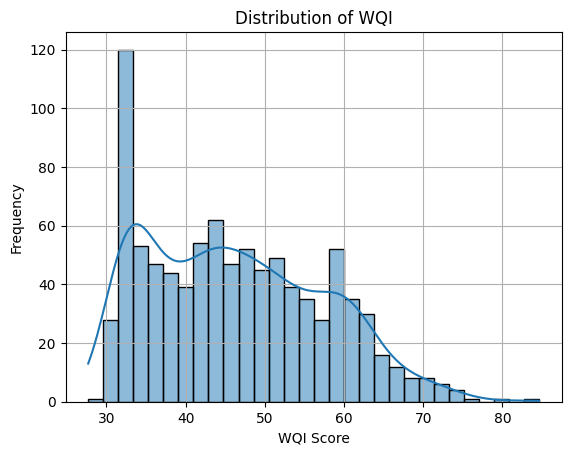

In [79]:
sns.histplot(data['WQI'], bins=30, kde=True)
plt.title("Distribution of WQI")
plt.xlabel("WQI Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [82]:
corr_data = data[ ['pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC','WQI'] ]
correlations = corr_data.corr(numeric_only=True)['WQI'].sort_values(ascending=False)
print("Top correlated features with WQI:\n", correlations)


Top correlated features with WQI:
 WQI     1.000000
DO      0.731068
SS      0.209841
NO2N    0.147135
TC     -0.039378
NO3N   -0.065196
pH     -0.080674
CO     -0.359785
HS     -0.485890
BO     -0.730465
AN     -0.737511
TKN    -0.756616
TP     -0.782269
Name: WQI, dtype: float64


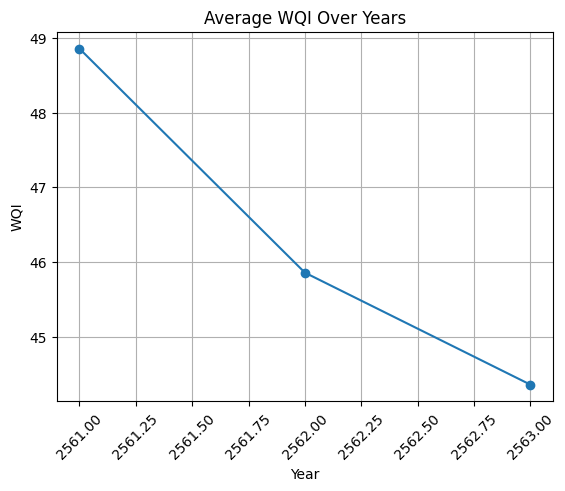

In [173]:
# Trend over year (if multiple years exist)
data.groupby('Year')['WQI'].mean().plot(marker='o')
plt.title("Average WQI Over Years")
plt.xlabel("Year")
plt.ylabel("WQI")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


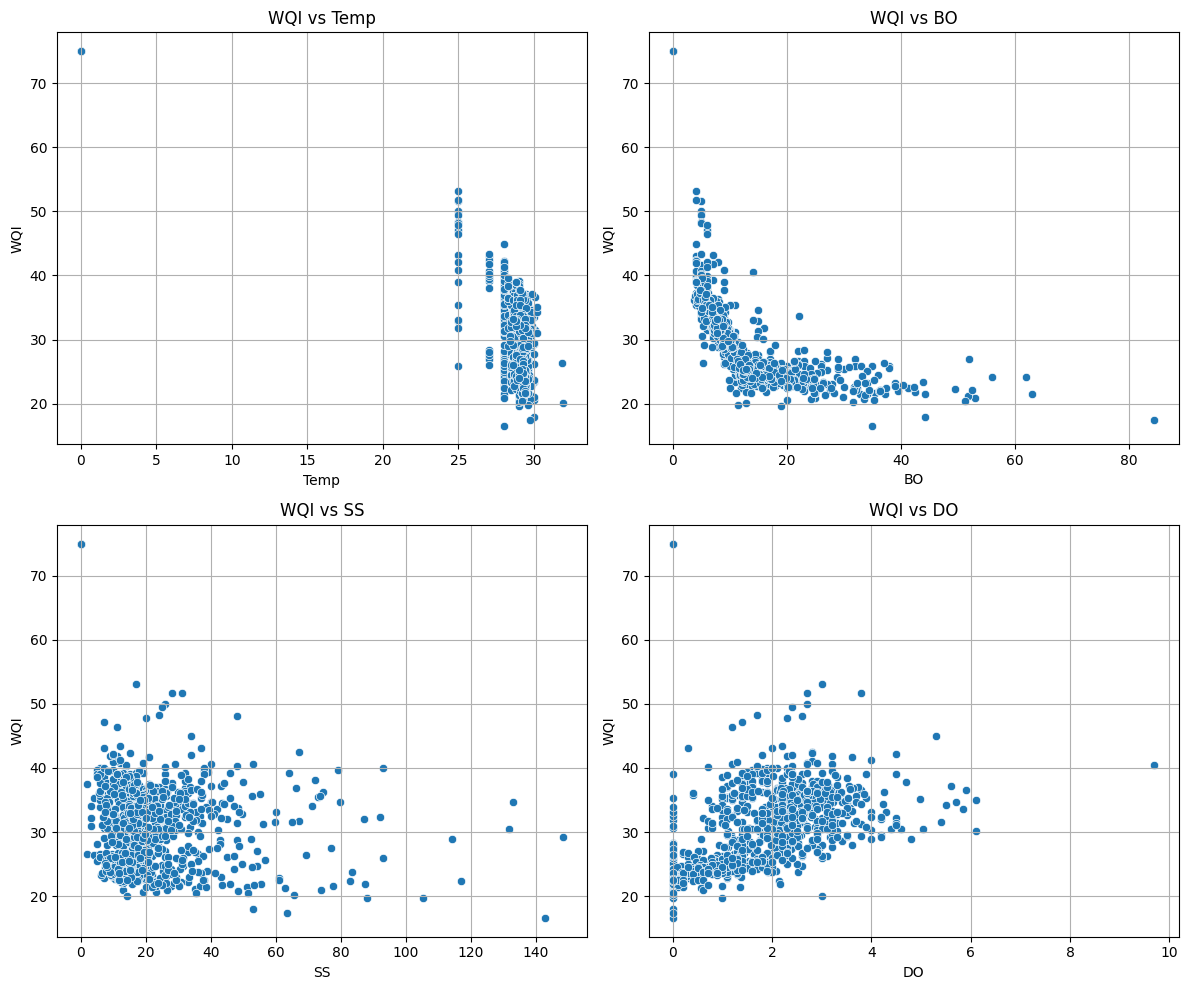

In [27]:
# Select top 4 key features to visualize against WQI
features = ['Temp', 'BO', 'SS', 'DO']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y='WQI', ax=axes[i])
    axes[i].set_title(f"WQI vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("WQI")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

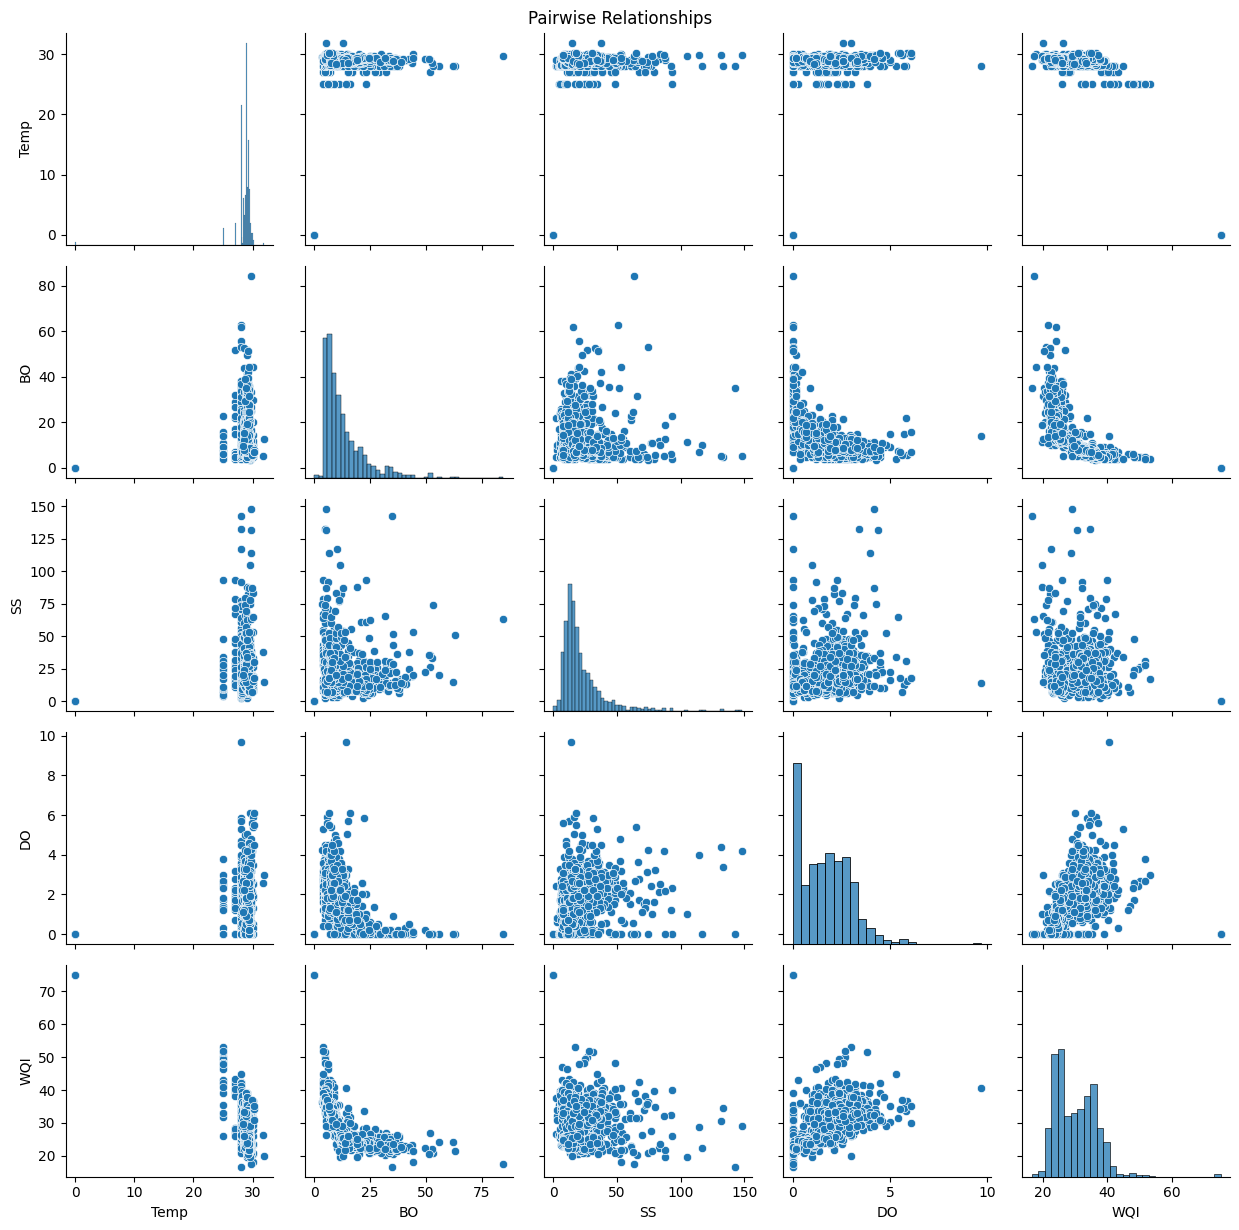

In [28]:
#pairplot
sns.pairplot(data[['Temp', 'BO', 'SS', 'DO', 'WQI']])
plt.suptitle("Pairwise Relationships")
plt.tight_layout()
plt.show()


<Axes: >

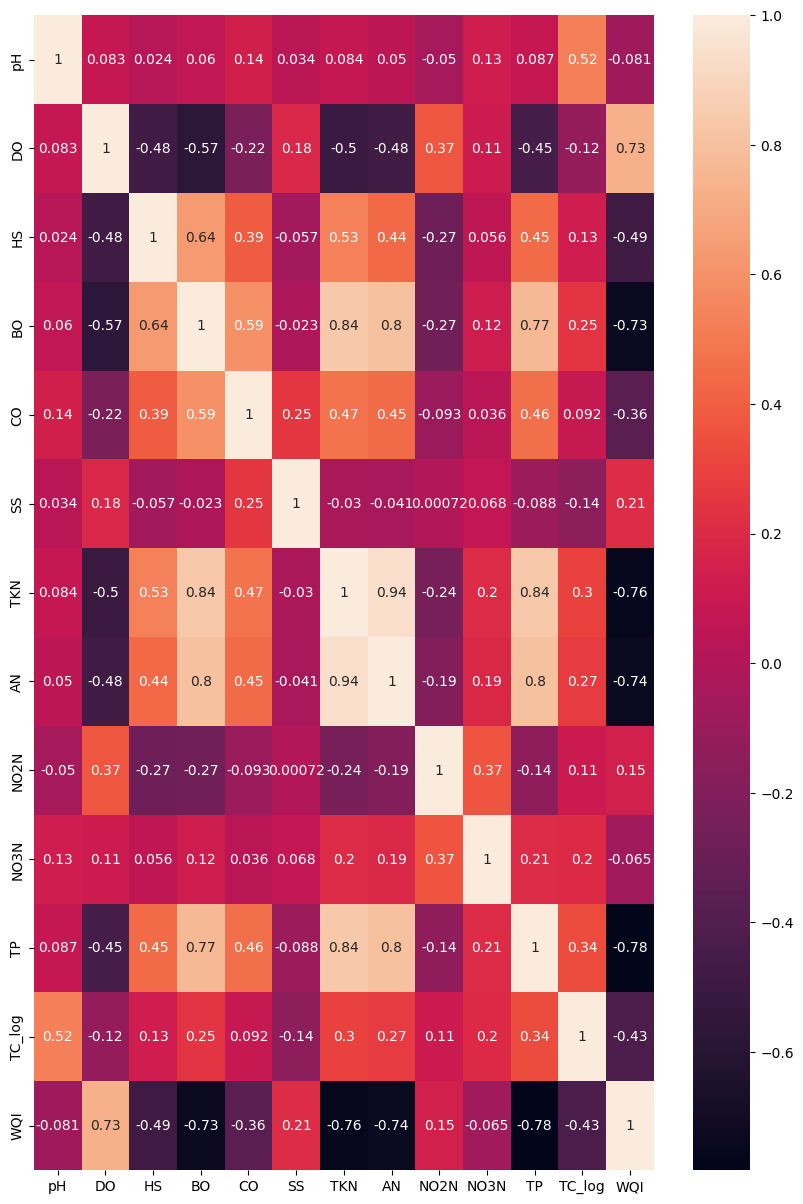

In [105]:
plt.figure(figsize=(10, 15))
corr_data = data[ ['pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC_log', 'WQI'] ]
sns.heatmap(corr_data.corr(), annot=True)

In [174]:
X = data[ ['BO', 'DO', 'CO', 'HS', 'TKN', 'TC_log'] ]
y = data['WQI']

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

In [176]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

        return [min_val, max_val]
    
    return []

In [177]:
# removing the outliers from the X_train columns using the bounds
for col in X_train.columns:
    bounds = []
    bounds = outlier_count(col)
    if len(bounds) == 0:
        continue
    
    X_train[col] = X_train[col].clip(lower=bounds[0], upper=bounds[1])


---------------BO---------------

Number of outliers: 50
Percent of data that is outlier: 6.42%

---------------DO---------------

Number of outliers: 5
Percent of data that is outlier: 0.64%

---------------CO---------------

Number of outliers: 34
Percent of data that is outlier: 4.36%

---------------HS---------------

Number of outliers: 73
Percent of data that is outlier: 9.37%

---------------TKN---------------

Number of outliers: 19
Percent of data that is outlier: 2.44%

---------------TC_log---------------

Number of outliers: 103
Percent of data that is outlier: 13.22%


In [178]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [194]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

algorithms = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [206]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in algorithms.items():
    cv_scores = cross_val_score(model, X_train_resampled, y_train, cv=kfold, scoring='neg_median_absolute_error')
    # Convert neg MSE to RMSE
    # rmse_scores = np.sqrt(-cv_scores)

    print(f"{name} - Score: {cv_scores}; Mean: {cv_scores.mean()}")

Linear Regression - Score: [-3.38274264 -3.75062778 -3.3987485  -3.52931506 -3.91550376]; Mean: -3.595387547895472
SVR - Score: [-1.68598499 -1.42501945 -1.7755843  -1.54753749 -1.42842284]; Mean: -1.572509814821893
Random Forest - Score: [-1.12526743 -1.24704434 -1.47134061 -1.24090725 -0.99135743]; Mean: -1.2151834105263106
Gradient Boosting - Score: [-1.10159268 -1.0747347  -1.12243389 -1.0976121  -1.00655535]; Mean: -1.0805857444412716


In [212]:
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [25, 50, 100, 200],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    # 'max_depth': [3, 4, 5, 6],  # Depth of trees
    # 'min_samples_split': [2, 5, 10],  # Min samples to split
    # 'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample for stochastic gradient boosting
    # 'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'loss': ['squared_error', 'absolute_error', 'huber'],  # Loss function
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for each split
}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb,
                           param_grid=param_grid_gb,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=0,
                           scoring='neg_median_absolute_error')

# Fit to training data
grid_search.fit(X_train_resampled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'loss': 'squared_error', 'max_features': None, 'n_estimators': 200}


In [213]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [214]:
import joblib

model_name = 'wpp_model_weight.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

['wpp_model_weight.pkl']

In [215]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred = loaded_model.predict(X_test)

In [222]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error

print("MSE    :", mean_squared_error(y_test, y_pred))
print("MAE:   :", mean_absolute_error(y_test, y_pred))
print("Med.AE :", median_absolute_error(y_test, y_pred))

print("R2:    :", r2_score(y_test, y_pred))

MSE    : 8.936953838687662
MAE:   : 2.2895711059209427
Med.AE : 1.8269026885972082
R2:    : 0.9226375420023508


In [217]:
df_comparison = pd.DataFrame({
    'Actual_ISQA': y_test,
    'Predicted_ISQA': y_pred
})

df_comparison['Error'] = df_comparison['Actual_ISQA'] - df_comparison['Predicted_ISQA']
# df_comparison['Error'].head()
df_comparison.sort_values(by='Error', ascending=False)

,Actual_ISQA,Predicted_ISQA,Error
78,63.066667,53.971751,9.094916
30,59.382222,50.856817,8.525405
165,59.075789,50.575416,8.500373
718,59.912515,52.441581,7.470934
412,62.616000,55.648275,6.967725
...,...,...,...
280,45.429240,49.982512,-4.553272
174,31.600000,36.300778,-4.700778
136,34.353684,40.641830,-6.288146
865,45.461754,53.119271,-7.657517


In [218]:
df_comparison['Error'].describe()

count    138.000000
mean      -0.271981
std        2.987921
min       -8.246471
25%       -2.316149
50%       -0.600521
75%        1.150628
max        9.094916
Name: Error, dtype: float64

Lets plot the distribution of the error.

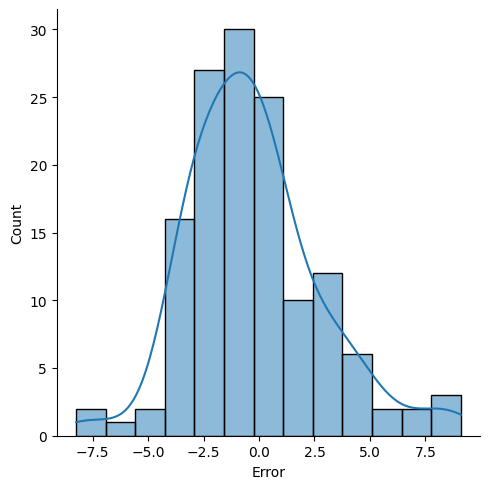

In [223]:
sns.displot(df_comparison['Error'], kde=True)